In [1]:
pip install ucimlrepo

In [2]:

from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.concat([X,y],axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Export DataFrame to a CSV file
df.to_csv("income_data_cleaned.csv", index=False)


In [6]:
df.shape

(48842, 15)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
(df.isnull().sum()/len(df))*100

,0
age,0.000000
workclass,1.971664
fnlwgt,0.000000
education,0.000000
education-num,0.000000
marital-status,0.000000
occupation,1.977806
relationship,0.000000
race,0.000000
sex,0.000000


## evident null values are present in some columns

In [9]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
df.duplicated().sum()

np.int64(29)

29 evident duplicates are present

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [12]:
# There are null values in workclass, occupation and native-country
# They are categorical columns
# So we can treat the null values with mode

for col in df.select_dtypes(include='object').columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

<ipython-input-12-3473fad073f7>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [13]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
df.columns=df.columns.str.replace('-','_')

In [15]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
cat_cols=df.select_dtypes(include='object').columns
print(f"Categorical columns are {cat_cols}")
num_cols=df.select_dtypes(exclude='object').columns
print(f"Numerical columns are {num_cols}")

Categorical columns are Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical columns are Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [17]:
# Checking the unique values in each column
for col in cat_cols:
  print(f"Unique values in {col} are {df[col].unique()}")
  print()

Unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Unique values in relationship are ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in race are ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

Unique values

In [18]:
for col in cat_cols:
  print(f"Value count of each unique element in {col}: {df[col].value_counts()}")
  print()

Value count of each unique element in workclass: workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Value count of each unique element in education: education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Value count of each unique element in marital_status: marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-abs

In [19]:
df[df['native_country']=='United-States']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [20]:
df['native_country'].value_counts()/len(df)*100

,count
native_country,
United-States,90.303427
Mexico,1.947095
?,1.193645
Philippines,0.603988
Germany,0.421768
Puerto-Rico,0.376725
Canada,0.372630
El-Salvador,0.317350
India,0.309160


In [21]:
# Clearly we can see that 90% of the data is present for the country of United States
# So we will be working on the data where the native_country is United States

In [22]:
new_df=df[df['native_country']=='United-States']
new_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [23]:
new_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44106 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             44106 non-null  int64 
 1   workclass       44106 non-null  object
 2   fnlwgt          44106 non-null  int64 
 3   education       44106 non-null  object
 4   education_num   44106 non-null  int64 
 5   marital_status  44106 non-null  object
 6   occupation      44106 non-null  object
 7   relationship    44106 non-null  object
 8   race            44106 non-null  object
 9   sex             44106 non-null  object
 10  capital_gain    44106 non-null  int64 
 11  capital_loss    44106 non-null  int64 
 12  hours_per_week  44106 non-null  int64 
 13  native_country  44106 non-null  object
 14  income          44106 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.4+ MB


In [25]:
cat_cols=new_df.select_dtypes(include='object').columns
print(f"Categorical columns are {cat_cols}")
num_cols=new_df.select_dtypes(include=np.number).columns
print(f"Numerical columns are {num_cols}")


Categorical columns are Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')
Numerical columns are Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [26]:
new_df[num_cols].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,44106.000000,4.410600e+04,44106.000000,44106.000000,44106.000000,44106.000000
mean,38.699769,1.871859e+05,10.173038,1093.039405,88.518456,40.438104
std,13.790543,1.051522e+05,2.397072,7479.897875,404.891647,12.470289
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.158030e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.766670e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.345370e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
new_df[cat_cols].describe().T

,count,unique,top,freq
workclass,44106,9,Private,31224
education,44106,16,HS-grad,14635
marital_status,44106,7,Married-civ-spouse,20127
occupation,44106,15,Prof-specialty,6461
relationship,44106,6,Husband,17832
race,44106,5,White,38680
sex,44106,2,Male,29412
native_country,44106,1,United-States,44106
income,44106,4,<=50K,21999


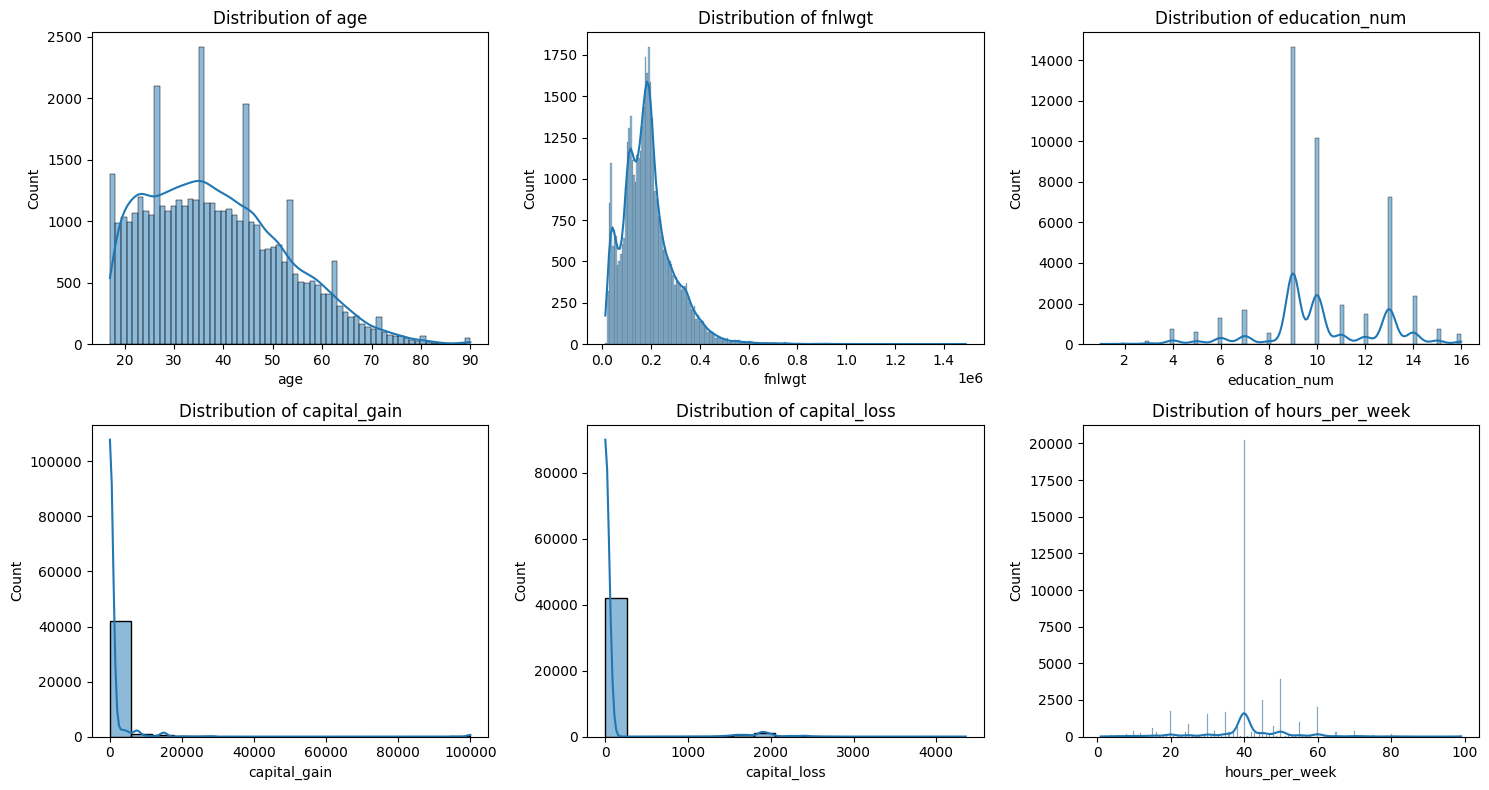

In [28]:
t=1
plt.figure(figsize=(15,8))
for col in num_cols:
  plt.subplot(2,3,t)
  sns.histplot(x=new_df[col],kde=True)
  plt.title(f"Distribution of {col}")
  t+=1
plt.tight_layout()
plt.show()

In [29]:
# Checking the unique values present in each categorical column
for col in cat_cols:
  print(f"Unique values in {col} are {new_df[col].unique()}")
  print('-------------------------------------------------------')

Unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' '?' 'Without-pay' 'Never-worked']
-------------------------------------------------------
Unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' 'Some-college' 'Assoc-acdm'
 'Doctorate' '9th' 'Assoc-voc' '10th' '7th-8th' 'Prof-school' '1st-4th'
 'Preschool' '5th-6th' '12th']
-------------------------------------------------------
Unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
-------------------------------------------------------
Unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Sales' 'Farming-fishing' 'Machine-op-inspct' 'Other-service'
 'Transport-moving' 'Tech-support' 'Craft-repair' 'Protective-serv' '?'
 'Armed-Forces' 'Priv-house-serv']
-------------------------------------------------------

In [30]:
# There are some anomalies present in the data
# In columns Workclass,Occupation, a '?' mark is present
# And as we have selected only the native_country as "United_states" there is only one value present in the column native_country
# So we will drop that column
# Also in our target column there are 2 values but wrongly typed a '.' after the <=50k and >50k
# So, we will remove the '.' mark

In [31]:
# salary={'<=50K.':'<=50K','>50K.':'>50K'}
# This we can map with the salary of new_df

In [32]:
# new_df['income']=new_df['income'].map(salary)
def clean(text):
  text=text.replace('.',"")
  return text

In [33]:
new_df['income']=new_df['income'].apply(clean)

<ipython-input-33-6394c89bc07c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['income']=new_df['income'].apply(clean)


In [34]:
new_df['income'].value_counts(normalize=True)

,proportion
income,
<=50K,0.755861
>50K,0.244139


In [35]:
new_df.shape

(44106, 15)

In [36]:
# We can see that the target variable is not equally splitted

In [37]:
for col in cat_cols:
  new_df[col]=new_df[col].replace('?',np.nan)

<ipython-input-37-bfc227a30b1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=new_df[col].replace('?',np.nan)


In [38]:
new_df.isnull().sum()

,0
age,0
workclass,1659
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,1666
relationship,0
race,0
sex,0


In [39]:
for col in cat_cols:
  new_df[col]=new_df[col].fillna(new_df[col].mode()[0])

<ipython-input-39-2e6750d0d62d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col]=new_df[col].fillna(new_df[col].mode()[0])


In [40]:
new_df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


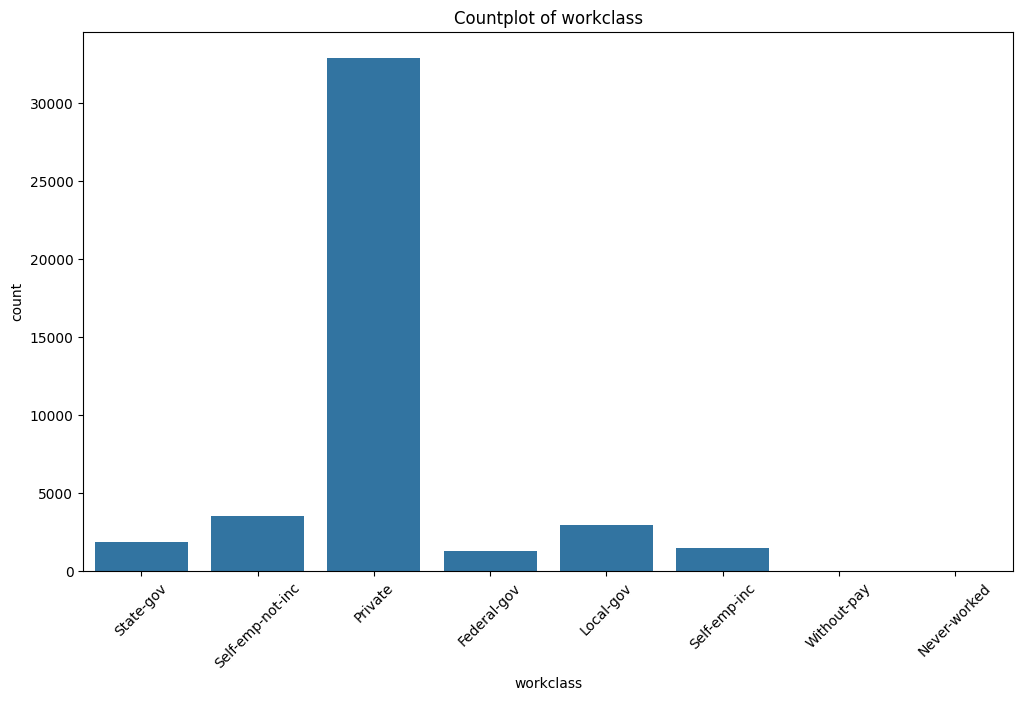

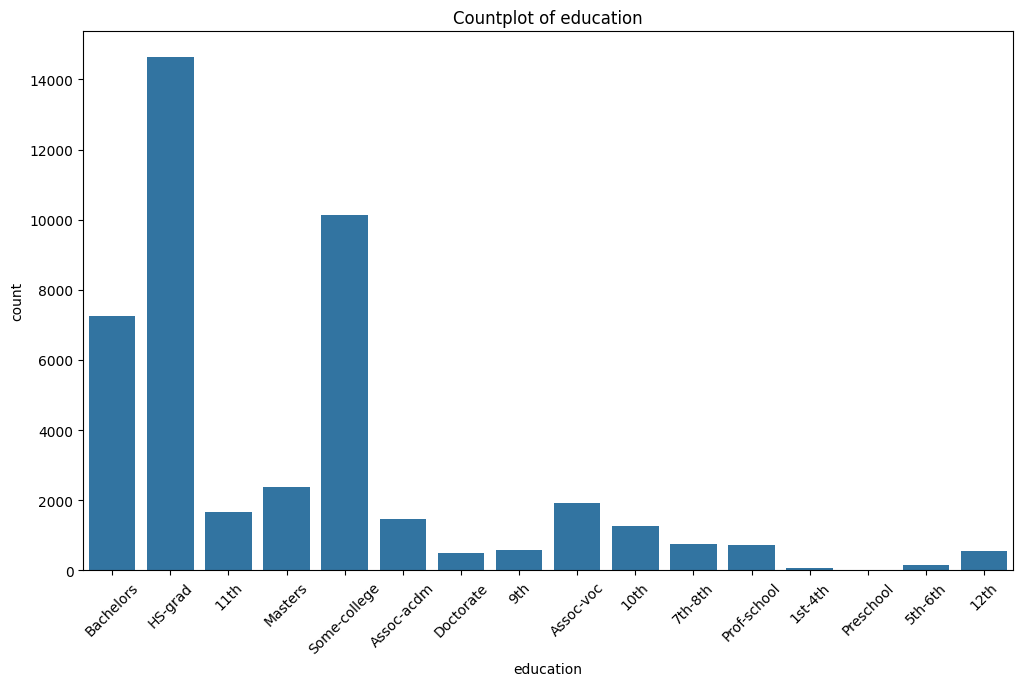

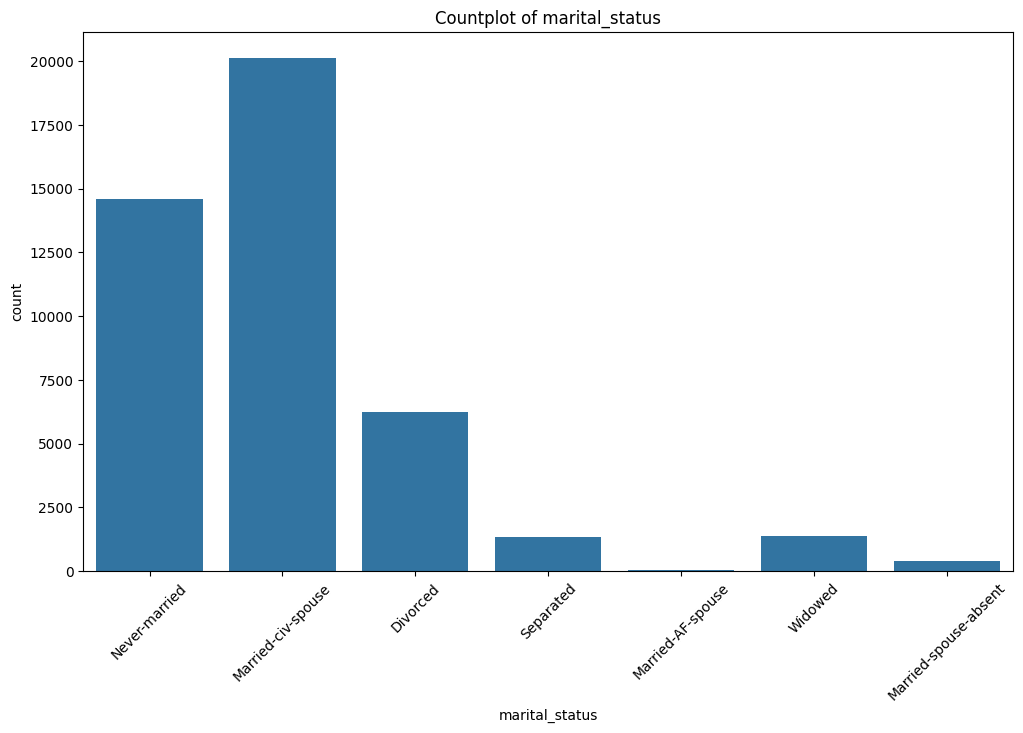

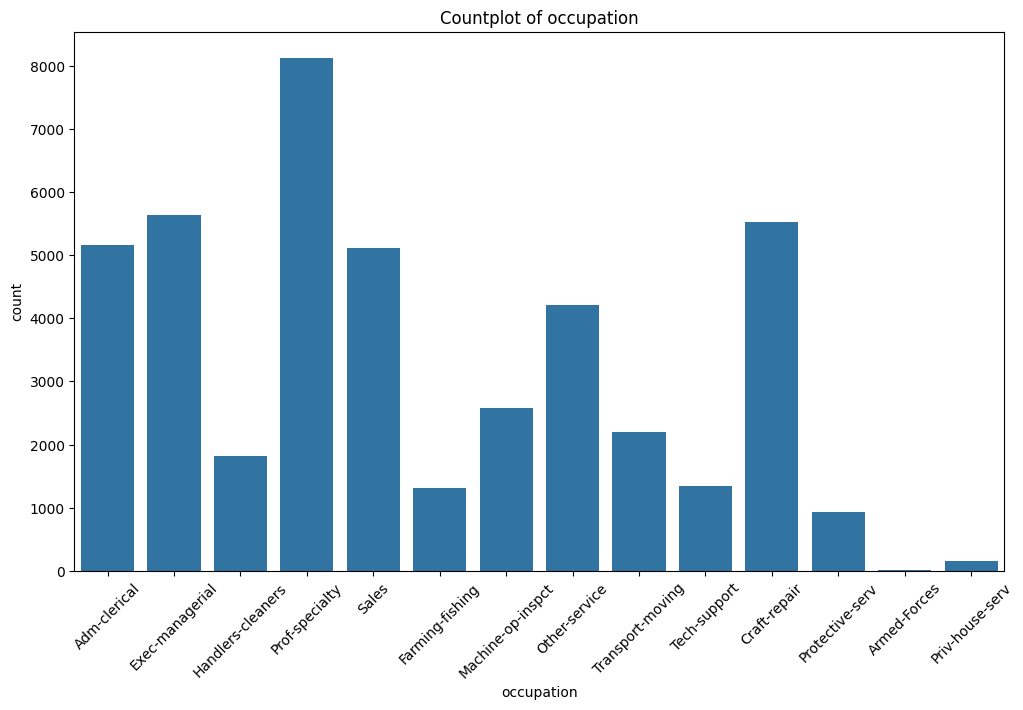

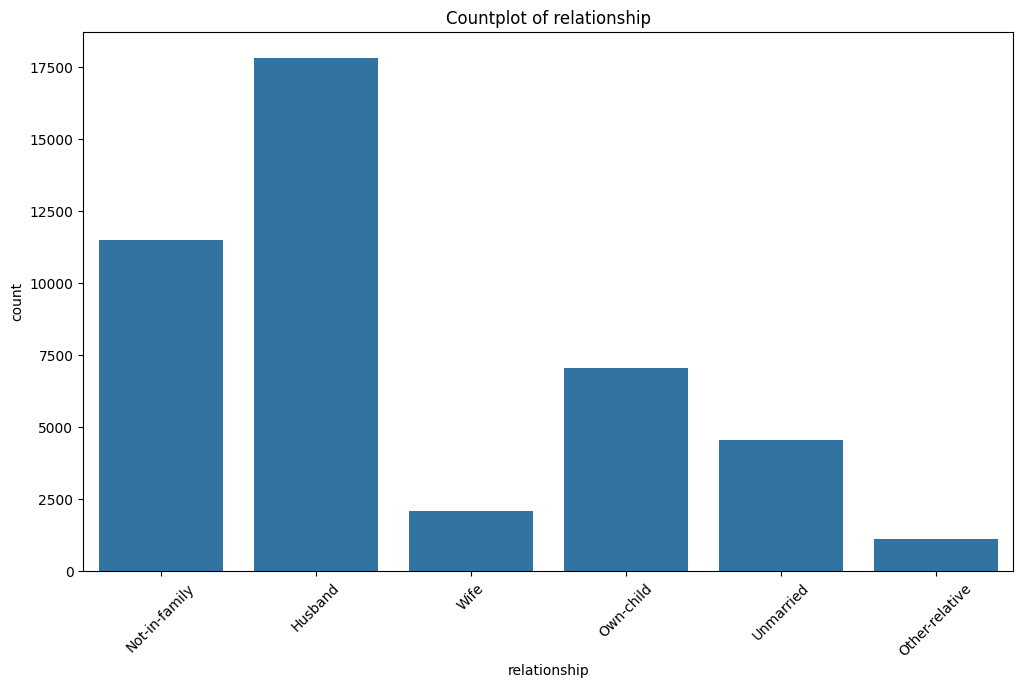

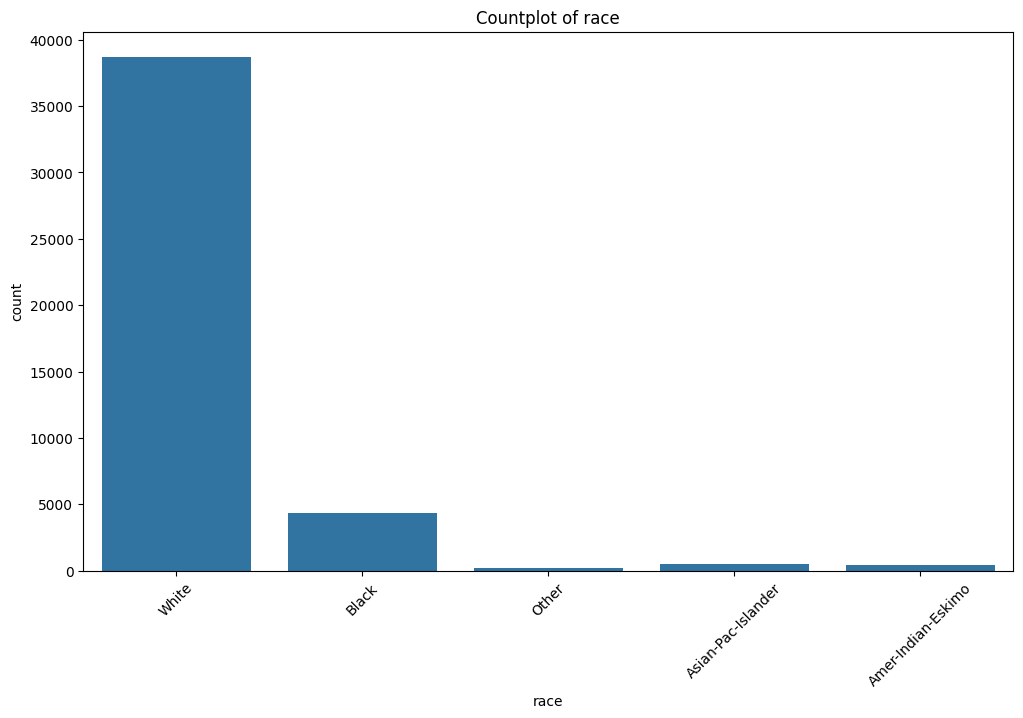

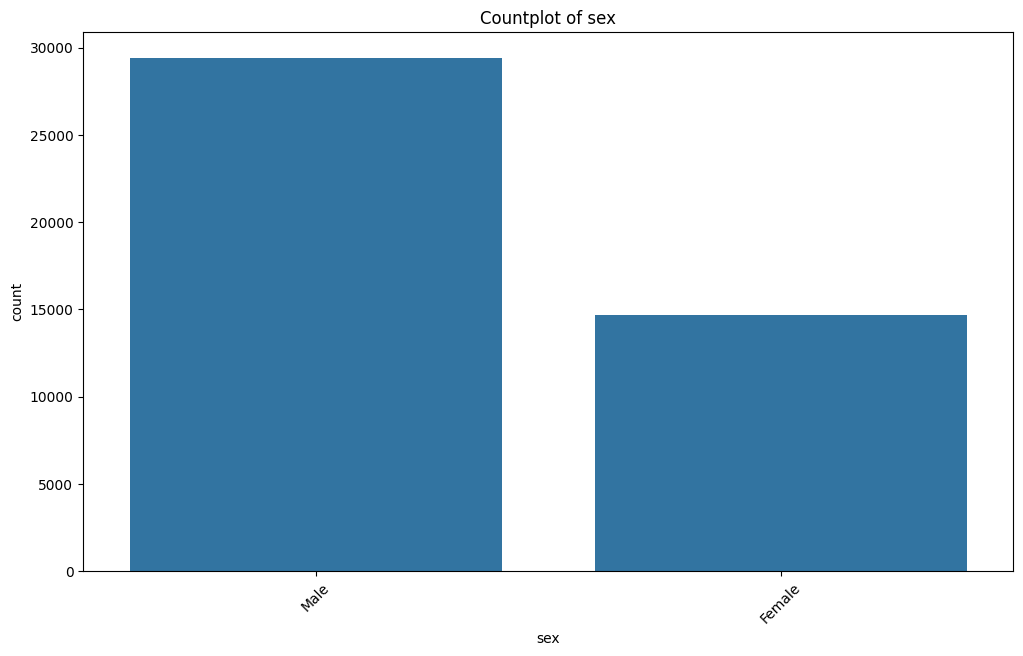

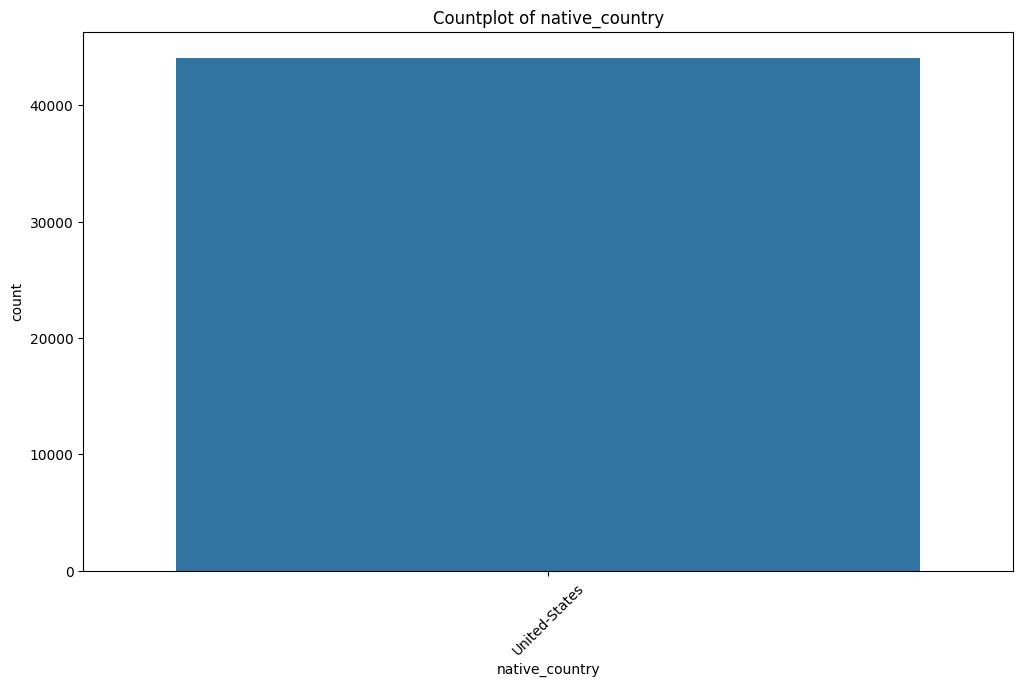

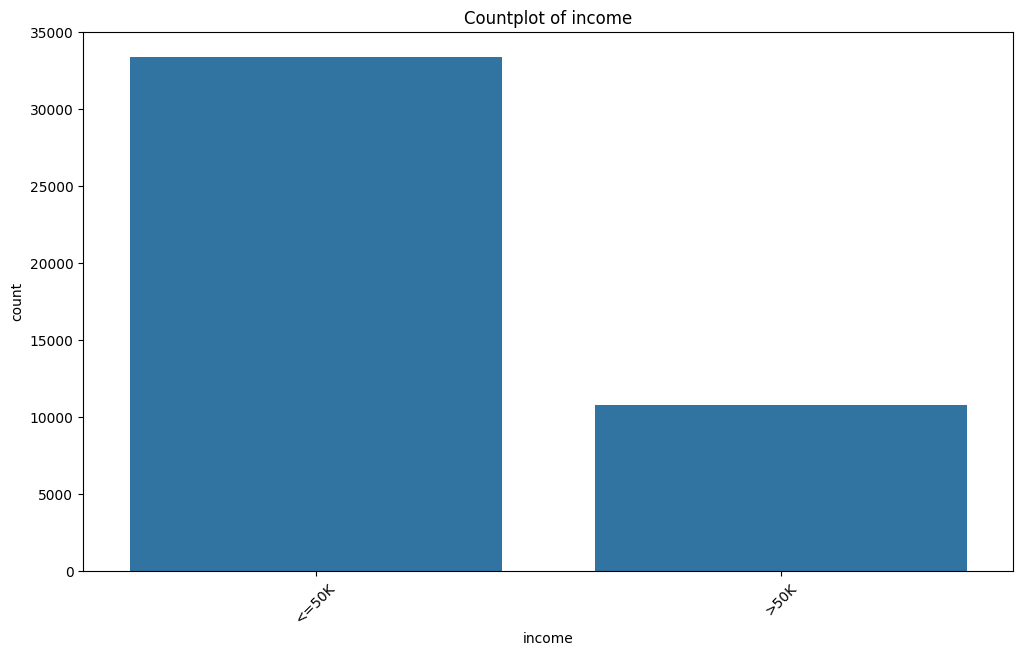

In [41]:
for col in cat_cols:
  plt.figure(figsize=(12,7))
  sns.countplot(x=new_df[col])
  plt.title(f"Countplot of {col}")
  plt.xticks(rotation=45)
  plt.show()

In [42]:
# As there is only one country present we can drop that column

In [43]:
new_df.drop(['native_country'],axis=1,inplace=True)

<ipython-input-43-7f15de9d744b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(['native_country'],axis=1,inplace=True)


In [44]:
new_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'income'],
      dtype='object')

In [45]:
cat_cols=new_df.select_dtypes(include='object').columns
print(cat_cols)

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')


In [46]:
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

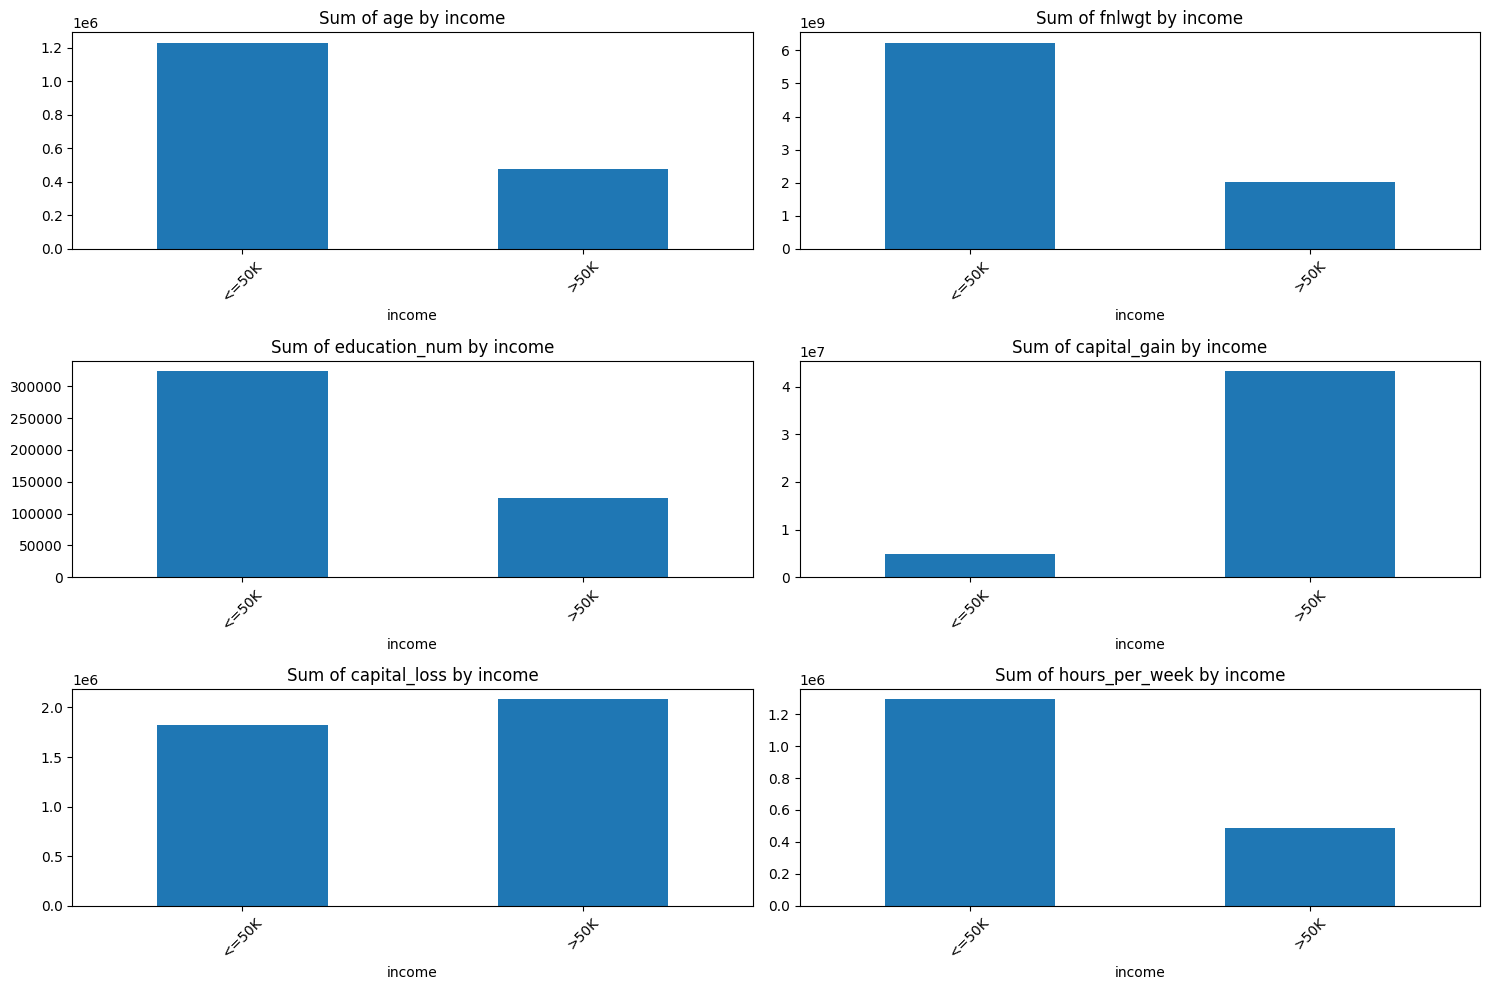

In [47]:
# Bi_variate analysis
# num vs Target
t=1
plt.figure(figsize=(15,10))
for col in num_cols:
  plt.subplot(3,2,t)
  new_df.groupby(['income'])[col].sum().plot(kind='bar')
  plt.xticks(rotation=45)
  plt.title(f"Sum of {col} by income")
  t+=1
plt.tight_layout()
plt.show()

<Figure size 1300x600 with 0 Axes>

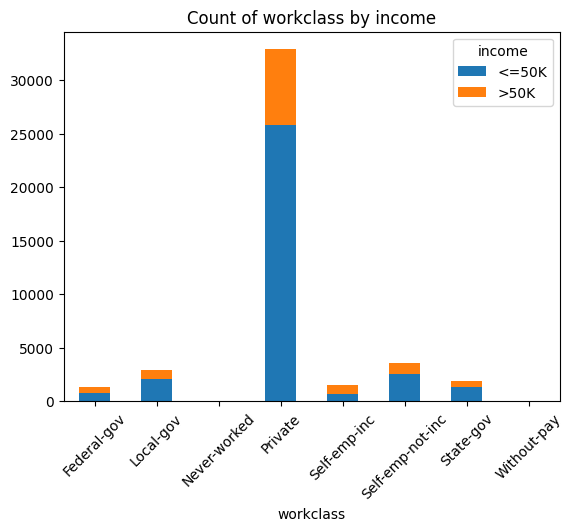

<Figure size 1300x600 with 0 Axes>

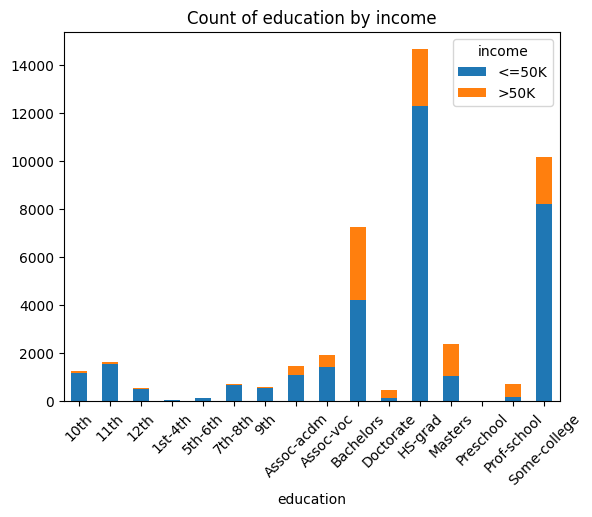

<Figure size 1300x600 with 0 Axes>

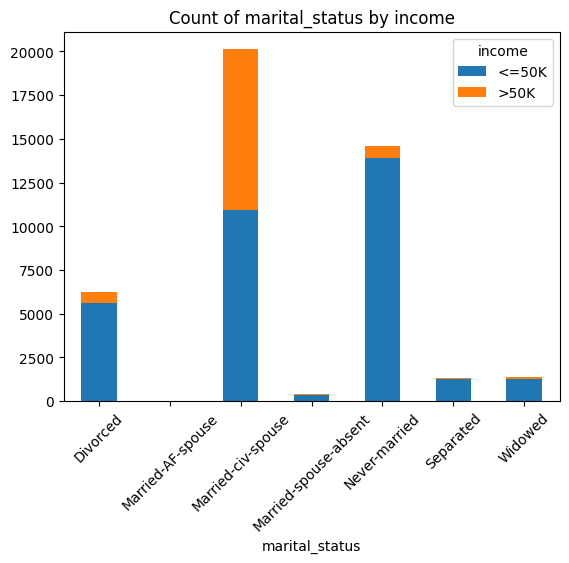

<Figure size 1300x600 with 0 Axes>

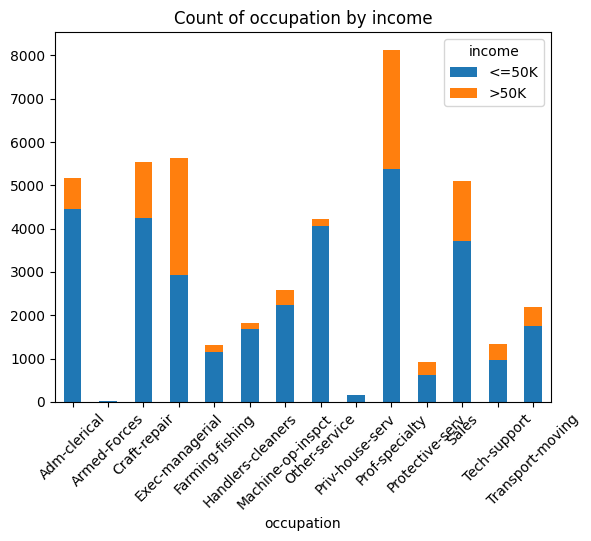

<Figure size 1300x600 with 0 Axes>

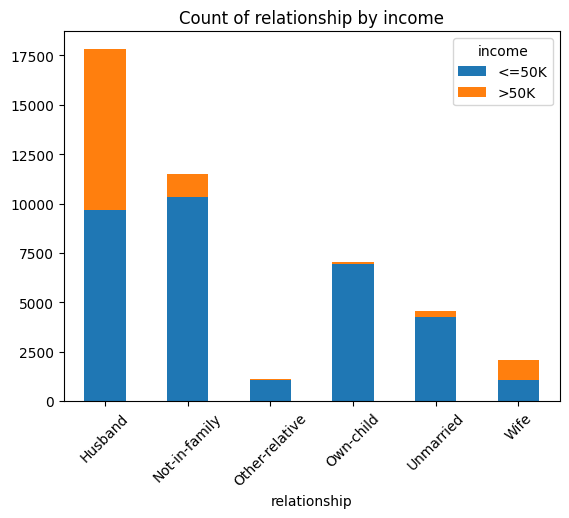

<Figure size 1300x600 with 0 Axes>

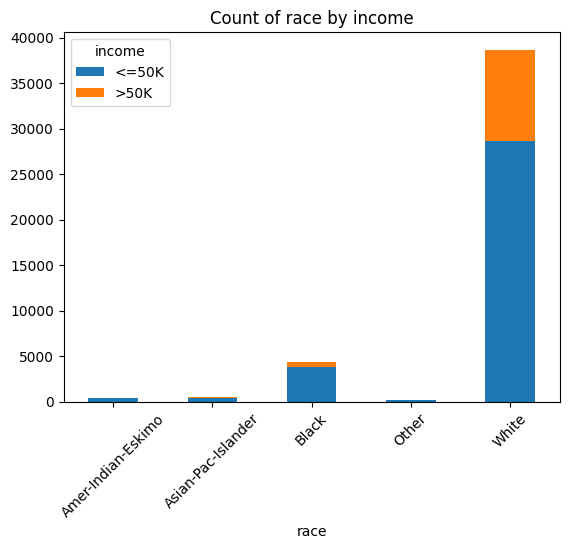

<Figure size 1300x600 with 0 Axes>

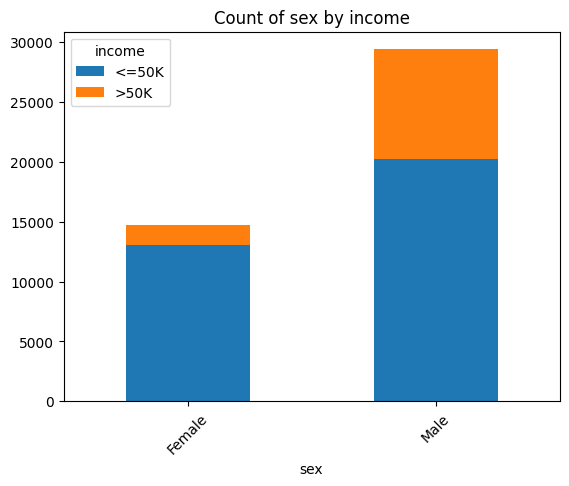

In [48]:
# Cat vs Cat
# t=1
# plt.figure(figsize=(,10))
for col in cat_cols:
  if col!='income':
    # plt.subplot(4,2,t)
    plt.figure(figsize=(13,6))
    (pd.crosstab(new_df[col],new_df['income'])).plot(kind='bar',stacked=True)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col} by income")
    plt.show()
    # t+=1
# plt.tight_layout()
# plt.show()

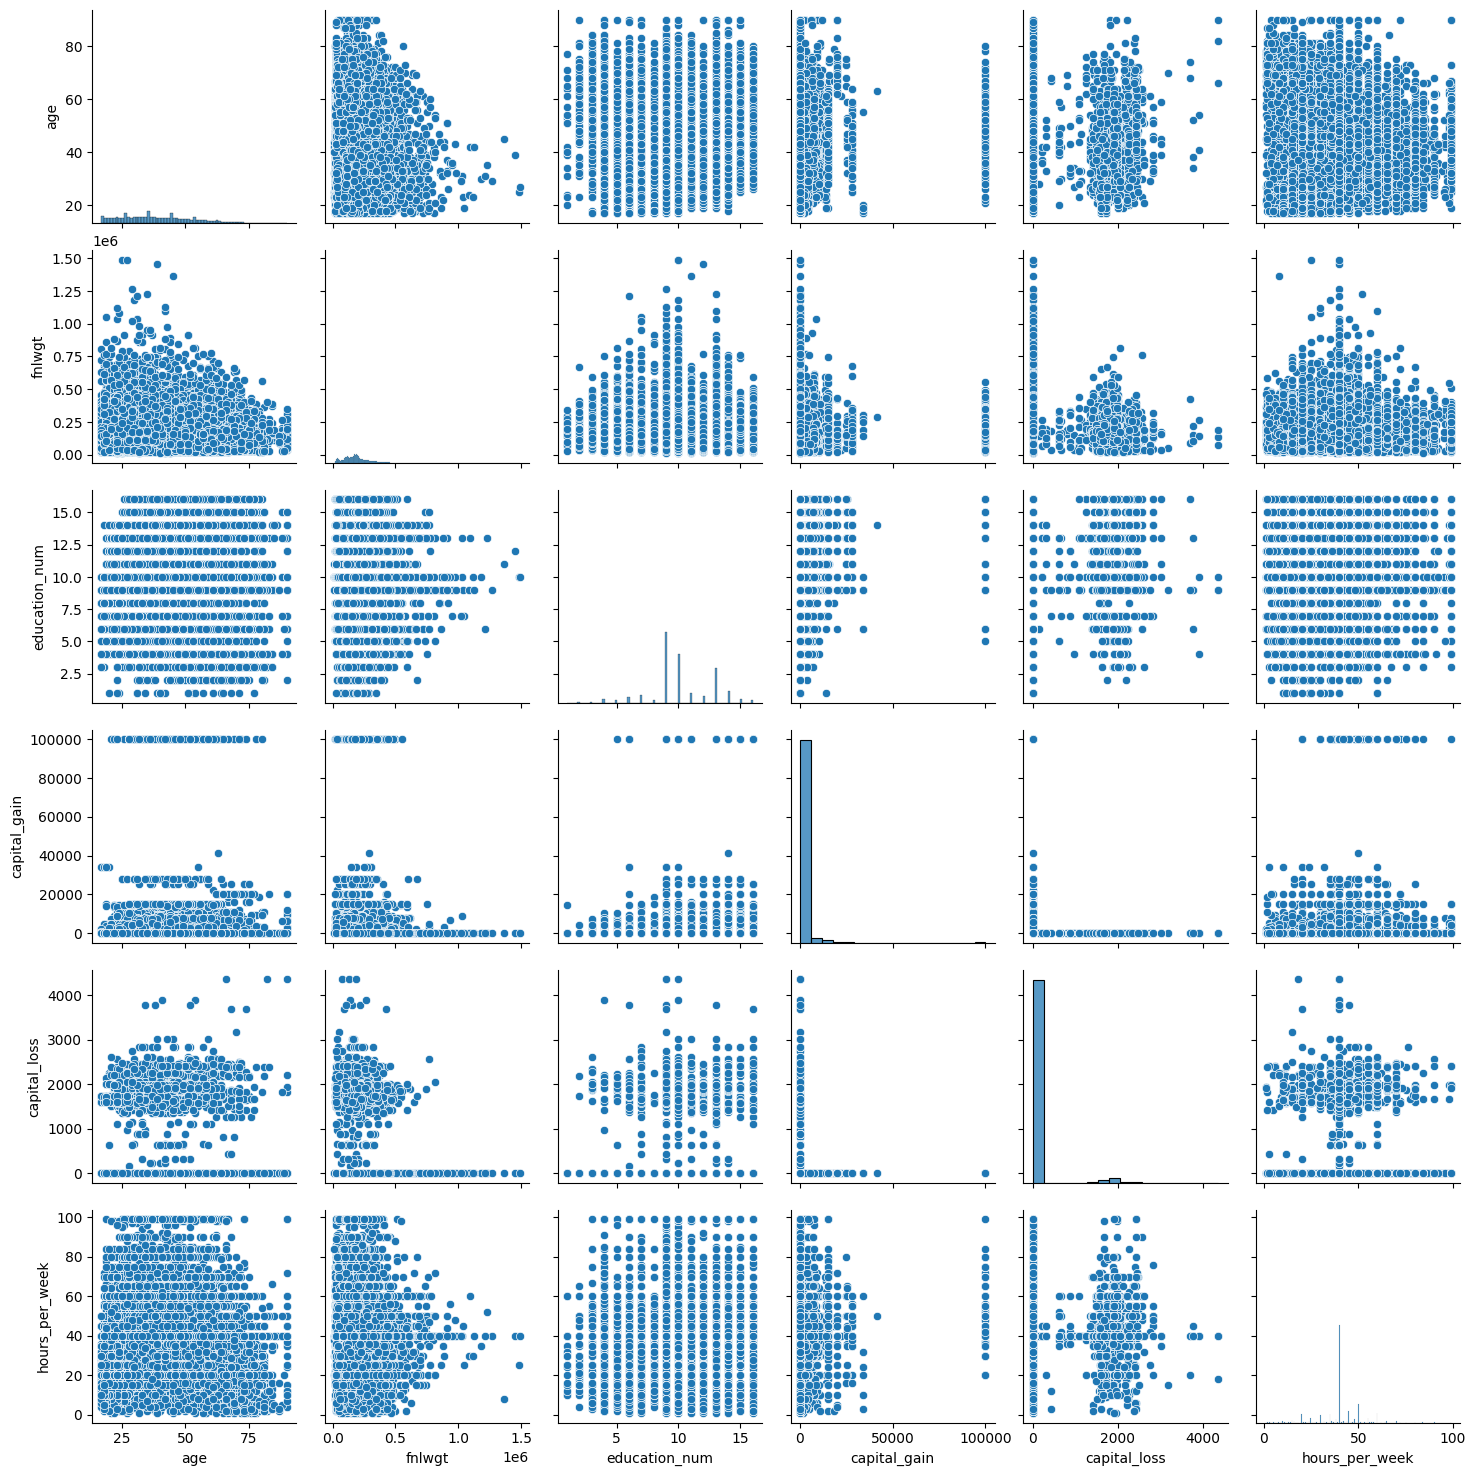

In [49]:
sns.pairplot(new_df)

<Axes: >

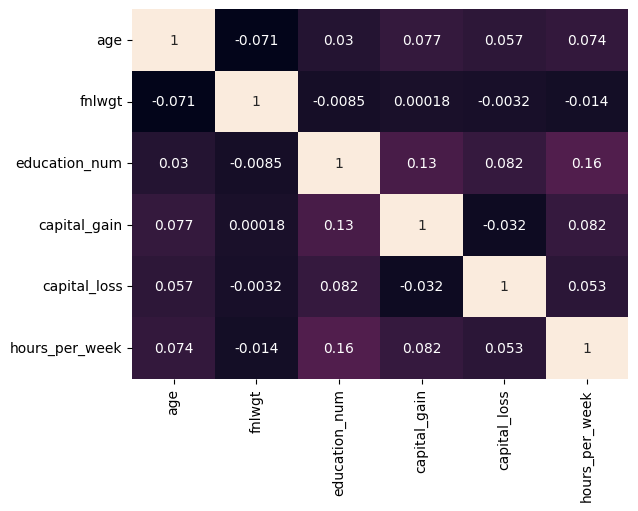

In [50]:
sns.heatmap(new_df[num_cols].corr(),annot=True,cbar=False)

In [51]:
new_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [52]:
# Statistical Analysis
# Num Vs Target
from scipy.stats import ttest_ind


In [53]:
significant_cols=[]
for col in num_cols:
  grp1=new_df[new_df['income']=='<=50K'][col]
  grp2=new_df[new_df['income']=='>50K'][col]
  tstat,pval=ttest_ind(grp1,grp2)

  if pval<0.05:
    significant_cols.append(col)
    print(f"p value of {col} is {pval}")
    print(f"{col} is a significant column")
    print()
  else:
    print(f"p value of {col} is {pval}")
    print(f"{col} is not a significant column")
    print()
print(f"Significant columns are {significant_cols}")


p value of age is 0.0
age is a significant column

p value of fnlwgt is 0.35605474725678077
fnlwgt is not a significant column

p value of education_num is 0.0
education_num is a significant column

p value of capital_gain is 0.0
capital_gain is a significant column

p value of capital_loss is 4.1218658759217896e-212
capital_loss is a significant column

p value of hours_per_week is 0.0
hours_per_week is a significant column

Significant columns are ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [54]:
significant_cols=[]
for col in num_cols:
  grp1=new_df[new_df['income']=='<=50K'][col]
  grp2=new_df[new_df['income']=='>50K'][col]
  tstat,pval=ttest_ind(grp1,grp2,equal_var=False)

  if pval<0.05:
    significant_cols.append(col)
    print(f"p value of {col} is {pval}")
    print(f"{col} is a significant column")
    print()
  else:
    print(f"p value of {col} is {pval}")
    print(f"{col} is not a significant column")
    print()
print(f"Significant columns are {significant_cols}")


p value of age is 0.0
age is a significant column

p value of fnlwgt is 0.3482606055469387
fnlwgt is not a significant column

p value of education_num is 0.0
education_num is a significant column

p value of capital_gain is 3.4029659531254485e-159
capital_gain is a significant column

p value of capital_loss is 4.257150179567356e-117
capital_loss is a significant column

p value of hours_per_week is 0.0
hours_per_week is a significant column

Significant columns are ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [55]:
# cat vs target
for col in cat_cols:
  print(f"unique values in {col} are {new_df[col].unique()}")
  print(f"number of unique values in {col} are {new_df[col].nunique()}")
  print()

unique values in workclass are ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
number of unique values in workclass are 8

unique values in education are ['Bachelors' 'HS-grad' '11th' 'Masters' 'Some-college' 'Assoc-acdm'
 'Doctorate' '9th' 'Assoc-voc' '10th' '7th-8th' 'Prof-school' '1st-4th'
 'Preschool' '5th-6th' '12th']
number of unique values in education are 16

unique values in marital_status are ['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
number of unique values in marital_status are 7

unique values in occupation are ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Sales' 'Farming-fishing' 'Machine-op-inspct' 'Other-service'
 'Transport-moving' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
number of unique values in occupation are 14

unique values in relationship are ['Not-in-fami

In [56]:
from scipy.stats import chi2_contingency

In [57]:
for col in cat_cols:
  ct_table=pd.crosstab(new_df[col],new_df['income'])
  chi_stats,p_val,dof,expected=chi2_contingency(ct_table)
  if p_val<0.05:
    significant_cols.append(col)
    print(f"{col} is dependent on income")
  else:
    print(f"{col} is  independent of income")
print(significant_cols)

workclass is dependent on income
education is dependent on income
marital_status is dependent on income
occupation is dependent on income
relationship is dependent on income
race is dependent on income
sex is dependent on income
income is dependent on income
['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'income']


In [58]:
nw_df=new_df[significant_cols]

In [59]:
categoric_cols=nw_df[significant_cols].select_dtypes(include='object').columns
categoric_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'income'],
      dtype='object')

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [61]:
for col in categoric_cols:
  nw_df[col]=encoder.fit_transform(nw_df[col])


<ipython-input-61-d8e0ccc0b928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df[col]=encoder.fit_transform(nw_df[col])
<ipython-input-61-d8e0ccc0b928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nw_df[col]=encoder.fit_transform(nw_df[col])
<ipython-input-61-d8e0ccc0b928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [62]:
nw_df.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,income
0,39,13,2174,0,40,6,9,4,0,1,4,1,0
1,50,13,0,0,13,5,9,2,3,0,4,1,0
2,38,9,0,0,40,3,11,0,5,1,4,1,0
3,53,7,0,0,40,3,1,2,5,0,2,1,0
5,37,14,0,0,40,3,12,2,3,5,4,0,0


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x=nw_df.drop(['income'],axis=1)
y=nw_df['income']

# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"Shape of xtrain: {x_train.shape}")
print(f"Shape of xtest: {x_test.shape}")
print(f"Shape of ytrain: {y_train.shape}")
print(f"Shape of ytest: {y_test.shape}")


Shape of xtrain: (35284, 12)
Shape of xtest: (8822, 12)
Shape of ytrain: (35284,)
Shape of ytest: (8822,)


In [65]:
from sklearn.linear_model import LogisticRegression


In [66]:
model1=LogisticRegression()
model1.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [68]:
ypred1=model1.predict(x_test)
print(f"print accuracy score of model1: {accuracy_score(y_test,ypred1)}")
print(f"print confusion matrix of model1: {confusion_matrix(y_test,ypred1)}")
print(f"print classification report of model1: {classification_report(y_test,ypred1)}")

print accuracy score of model1: 0.7948311040580367
print confusion matrix of model1: [[6271  369]
 [1441  741]]
print classification report of model1:               precision    recall  f1-score   support

           0       0.81      0.94      0.87      6640
           1       0.67      0.34      0.45      2182

    accuracy                           0.79      8822
   macro avg       0.74      0.64      0.66      8822
weighted avg       0.78      0.79      0.77      8822



In [69]:
 from sklearn.tree import DecisionTreeClassifier
 model2=DecisionTreeClassifier()
 model2.fit(x_train,y_train)


DecisionTreeClassifier()

In [70]:
ypred2=model2.predict(x_test)

In [71]:
print(f"accuracy score of model2: {accuracy_score(y_test,ypred2)}")
print(f"confusion matrix of model2: {confusion_matrix(y_test,ypred2)}")
print(f"classification report of model2: {classification_report(y_test,ypred2)}")

accuracy score of model2: 0.813647698934482
confusion matrix of model2: [[5877  763]
 [ 881 1301]]
classification report of model2:               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6640
           1       0.63      0.60      0.61      2182

    accuracy                           0.81      8822
   macro avg       0.75      0.74      0.75      8822
weighted avg       0.81      0.81      0.81      8822



In [72]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
ypred3=model3.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred3)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred3)}")
print(f"classification report: \n {classification_report(y_test,ypred3)}")

accuracy:0.8467467694400362
confusion matrix:[[6111  529]
 [ 823 1359]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6640
           1       0.72      0.62      0.67      2182

    accuracy                           0.85      8822
   macro avg       0.80      0.77      0.78      8822
weighted avg       0.84      0.85      0.84      8822



In [74]:
pip install xgboost

In [75]:
from xgboost import XGBClassifier


In [76]:
model4=XGBClassifier()
model4.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
ypred4=model4.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred4)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred4)}")
print(f"classification report: \n {classification_report(y_test,ypred4)}")

accuracy:0.8711176603944684
confusion matrix:[[6252  388]
 [ 749 1433]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6640
           1       0.79      0.66      0.72      2182

    accuracy                           0.87      8822
   macro avg       0.84      0.80      0.82      8822
weighted avg       0.87      0.87      0.87      8822



In [78]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [79]:
import lightgbm
import catboost

In [80]:
model5=lightgbm.LGBMClassifier()
model5.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 8586, number of negative: 26698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 35284, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243340 -> initscore=-1.134456
[LightGBM] [Info] Start training from score -1.134456


LGBMClassifier()

In [81]:
ypred5=model5.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred5)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred5)}")
print(f"classification report: \n {classification_report(y_test,ypred5)}")

accuracy:0.8666968941283155
confusion matrix:[[6238  402]
 [ 774 1408]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6640
           1       0.78      0.65      0.71      2182

    accuracy                           0.87      8822
   macro avg       0.83      0.79      0.81      8822
weighted avg       0.86      0.87      0.86      8822



In [82]:
model6=catboost.CatBoostClassifier()
model6.fit(x_train,y_train)

Learning rate set to 0.047179
0:	learn: 0.6476435	total: 56.5ms	remaining: 56.5s
1:	learn: 0.6042938	total: 66.3ms	remaining: 33.1s
2:	learn: 0.5667841	total: 75ms	remaining: 24.9s
3:	learn: 0.5336089	total: 83.7ms	remaining: 20.9s
4:	learn: 0.5114419	total: 98.1ms	remaining: 19.5s
5:	learn: 0.4891631	total: 126ms	remaining: 20.9s
6:	learn: 0.4700612	total: 136ms	remaining: 19.3s
7:	learn: 0.4528825	total: 145ms	remaining: 18s
8:	learn: 0.4380553	total: 155ms	remaining: 17.1s
9:	learn: 0.4260725	total: 164ms	remaining: 16.3s
10:	learn: 0.4157807	total: 174ms	remaining: 15.6s
11:	learn: 0.4058339	total: 183ms	remaining: 15s
12:	learn: 0.3961539	total: 191ms	remaining: 14.5s
13:	learn: 0.3881243	total: 205ms	remaining: 14.4s
14:	learn: 0.3813772	total: 220ms	remaining: 14.5s
15:	learn: 0.3765132	total: 229ms	remaining: 14.1s
16:	learn: 0.3710528	total: 239ms	remaining: 13.8s
17:	learn: 0.3664578	total: 248ms	remaining: 13.5s
18:	learn: 0.3622300	total: 257ms	remaining: 13.3s
19:	learn: 0

In [83]:
ypred6=model6.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred6)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred6)}")
print(f"classification report: \n {classification_report(y_test,ypred6)}")

accuracy:0.8704375425073679
confusion matrix:[[6264  376]
 [ 767 1415]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6640
           1       0.79      0.65      0.71      2182

    accuracy                           0.87      8822
   macro avg       0.84      0.80      0.81      8822
weighted avg       0.87      0.87      0.87      8822



In [84]:
# our final model will be xgboost classifier model i.e, model4

In [85]:
# now we will perform hyperparameter tuning on model4

In [86]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05,0.01,0.001],
    'subsample': [0.8, 1.0],
    # 'scale_pos_weight': [1, 3]
}

In [93]:
gridmodel = GridSearchCV(
    estimator=model4,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [94]:
gridmodel.fit(x_train, y_train)

print("Best parameters found: ", gridmodel.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


In [95]:
ypred7=gridmodel.predict(x_test)
print(f"accuracy:{accuracy_score(y_test,ypred7)}")
print(f"confusion matrix:{confusion_matrix(y_test,ypred7)}")
print(f"classification report: \n {classification_report(y_test,ypred7)}")

accuracy:0.8674903649965994
confusion matrix:[[6248  392]
 [ 777 1405]]
classification report: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      6640
           1       0.78      0.64      0.71      2182

    accuracy                           0.87      8822
   macro avg       0.84      0.79      0.81      8822
weighted avg       0.86      0.87      0.86      8822

